In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Задача 1
Примените алгоритм Metropolis для генерации выборки из распределения с плотностью p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.


In [9]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

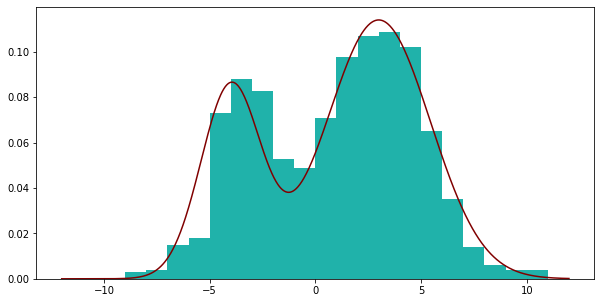

In [21]:

value = lambda x: 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
proposal = lambda x: (x + np.random.choice([-1, 1])+10)%21-10
res = metroplis(0, value, proposal, 1000)

plt.figure(figsize=(10, 5))
plt.hist(res, bins=np.arange(-12,12), density=True, color = "lightseagreen")

x = np.linspace(-12, 12, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

plt.plot(x, y, color = "maroon")
plt.show()

Задача 2 
Оценить  En(ξ)  для графа 10х10
Построить график распределеиня  n(ξ)

In [99]:
vert = np.zeros((10, 10))
colored_vert = []
for i in range(1990): 
  x = np.random.randint(10)
  y = np.random.randint(10)
  if(vert[x,y] == 0):
    if(vert[max(x - 1, 0), y] != 1 and 
       vert[min(x + 1, 10 - 1), y] != 1 and 
       vert[x, max(y - 1, 0)] != 1 and 
       vert[x, min(y + 1, 10 - 1)] != 1):
      vert[x, y] = 1
  else:
    vert[x, y] = 0

  colored_vert += [vert.sum()]
print(np.mean(colored_vert))

22.913065326633166


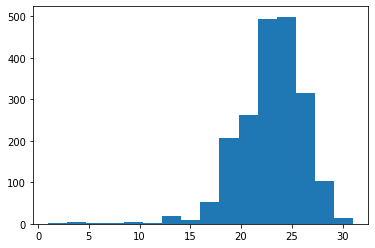

In [106]:
plt.hist(colored_vert, bins = 16)
plt.show()
